In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n0_list = [347.20579, 218.14463, 135.45014, 92.97003, 67.98196, 52.01336, 42.11769, 34.67222]
deltaH_list = [18401.29795, 17953.99221, 17453.89964, 17081.12875, 16757.13094, 16474.83893, 16229.14415, 15990.43372]
f1 = np.polyfit(np.sqrt(n0_list), deltaH_list, 5)
print('f1 is :\n',f1)
p1 = np.poly1d(f1)
print('p1 is :\n',p1)

f1 is :
 [ 8.60368563e-03 -6.31164750e-01  1.81749317e+01 -2.62597337e+02
  2.09255482e+03  9.76137773e+03]
p1 is :
           5          4         3         2
0.008604 x - 0.6312 x + 18.17 x - 262.6 x + 2093 x + 9761


In [3]:
def fitted_expression(x):
    return 0.008604*x**5-0.6312*x**4+18.17*x**3-262.6*x**2+2093*x+9761
n0_fit = [30+i*0.32 for i in range(1000)]
deltaH_fit = [fitted_expression(np.sqrt(n0)) for n0 in n0_fit]

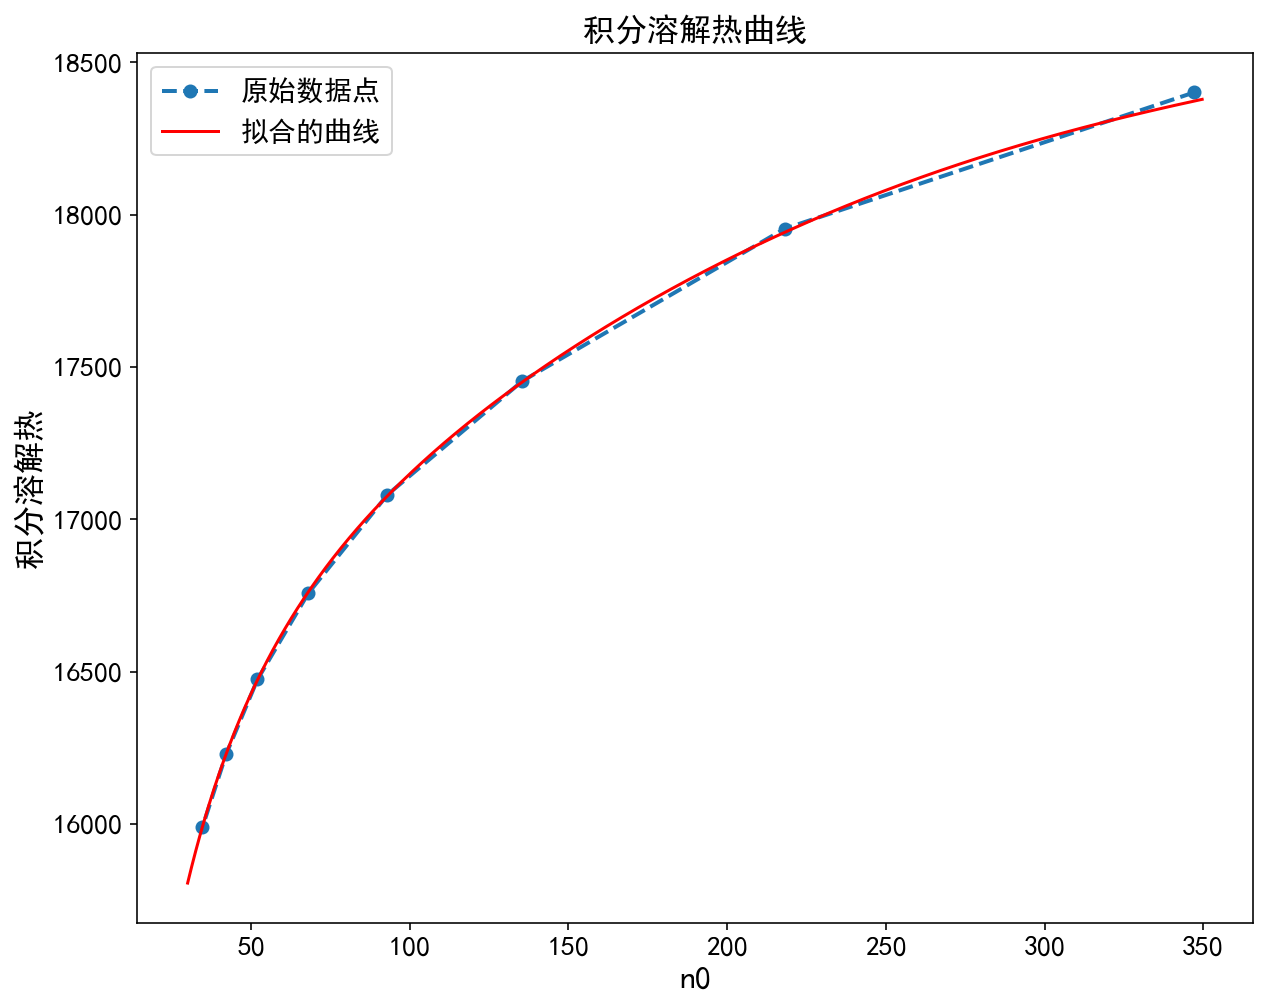

In [47]:
# make Chinese characters display normally
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(n0_list, deltaH_list,'--o', linewidth = 2.0)
ax.plot(n0_fit, deltaH_fit,'-', color = 'r', linewidth = 1.5)
font1 = {'weight': 'normal','size': 14}
ax.legend(['原始数据点','拟合的曲线'], prop = font1)
ax.set_xlabel('n0', fontsize = 16)
ax.set_ylabel('积分溶解热', fontsize = 16)
plt.tick_params(labelsize = 14)
plt.title('积分溶解热曲线', fontsize = 16)
plt.show()

In [40]:
from scipy.misc import derivative
# the function of fitted curve, n0 as the variable
def f(x):
    return 0.008604*x**2.5-0.6312*x**2+18.17*x**1.5-262.6*x+2093*x**0.5+9761
# function to print the integral heat of solution
def ihs(x):
    print(f'n0 = {x}时，积分溶解热为 {f(x):.3f} J/mol')
# function to print the differential heat of dilution
def dhd(x):
    print(f'n0 = {x}时，微分稀释热为 {derivative(f, x, dx=1e-6):.3f} J/mol')
# function to print the integral heat of dilution between n01 and n02
def ihd(x, y):
    print(f'n01 = {x}, n02 = {y}时，积分稀释热为 {f(y)-f(x):.3f} J/mol')

In [37]:
for n0 in [80, 100, 200, 300, 400]:
    ihs(n0)
    dhd(n0)

n0 = 80时，积分溶解热为 16927.596 J/mol
n0 = 80时，微分稀释热为 12.578 J/mol
n0 = 100时，积分溶解热为 17149.400 J/mol
n0 = 100时，微分稀释热为 9.870 J/mol
n0 = 200时，积分溶解热为 17852.168 J/mol
n0 = 200时，微分稀释热为 5.202 J/mol
n0 = 300时，积分溶解热为 18251.222 J/mol
n0 = 300时，微分稀释热为 2.939 J/mol
n0 = 400时，积分溶解热为 18481.800 J/mol
n0 = 400时，微分稀释热为 1.945 J/mol


In [41]:
n01_list = [80, 100, 200, 300]
n02_list = [100, 200, 300, 400]
for x, y in zip(n01_list, n02_list):
    ihd(x, y)

n01 = 80, n02 = 100时，积分稀释热为 221.804 J/mol
n01 = 100, n02 = 200时，积分稀释热为 702.768 J/mol
n01 = 200, n02 = 300时，积分稀释热为 399.053 J/mol
n01 = 300, n02 = 400时，积分稀释热为 230.578 J/mol
